# 텍스트 마이닝 3 - 자연어 텍스트 처리 (NLTK & KoNLPy) 

<div align='center'>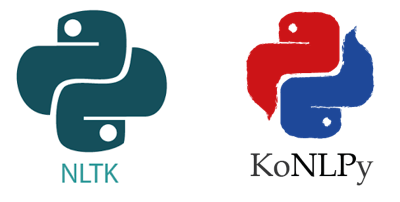</div>

### 코랩: 한글 폰트 설치

1.한글 폰트 설치

In [ ]:
#폰트 설치
! apt install fonts-nanum*

In [ ]:
! apt install fontconfig

2. 폰트 캐시 생성

In [ ]:
#폰트 캐시 생성
!fc-cache -fv

3. matplotlib에 남아있는 font 캐시 삭제

In [ ]:
# matplotlib에 남아있는 font 캐시 삭제
!rm -rf ~/.cache/matplotlib/*

4. Runtime 재실행

In [ ]:
import matplotlib.font_manager as fm
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = fontname
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글 테스트')

# NLTK

NLTK(Natural Language Toolkit): 자연어 처리 및 문서 분석용 패키지
1. 말뭉치
2. 토큰 생성
3. 형태소 분석
4. 품사 태깅

NLTK 설치

In [ ]:
! pip install nltk

## 1. NLTK 코퍼스 (nltk.corpus 모듈)
http://www.nltk.org/nltk_data/ (전체목록)

주요 코퍼스
* gutenberg : 모비딕(Moby Dick), 성서등 구텐베르크 프로젝트 영문 책 텍스트 18개
* reuters: 10,788 뉴스 문서, 천3백만 단어, 90개 토픽, "training" 과 "test"로 나누어져 있다. 
* brown : 브라운대(1961) 최초 백만단어 코퍼스, 뉴스 학습자료등 카테고리가 나누어져 있다
* names : 8,000개의 남성과 여성의 이름
* words : 가장 빈번하게 사용하는 영어 단어 23,5000개
* stopwords : 14개의 언어의 가장 많이 사용하는 불용어(stop word)
* cmudict : 카네기멜론대, 13,4000개 단어와 그 음절(syllables)로 구성. 동음이의어(homophones) 검색.

In [ ]:
import nltk

nltk.download("gutenberg")
nltk.download("reuters")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 

In [ ]:
# 제공되는 텍스트 문서 확인
import nltk
fileids = nltk.corpus.gutenberg.fileids()
print(fileids)

* corpus.fileids() # 코퍼스에 포함된 파일아이디 목록
* corpus.raw(fileid) # 파일의 원문
* corpus.sents(fileid) #파일의 문장 목록
* corpus.words(fileid) # 파일의 단어 목록

In [ ]:
from nltk.corpus import gutenberg

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # 문자수
    num_words = len(gutenberg.words(fileid)) # 단어수
    num_sents = len(gutenberg.sents(fileid)) # 문장수
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) # 어휘수
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

### 말뭉치 문서 읽기

In [ ]:
import nltk
from nltk.corpus import gutenberg

In [ ]:
nltk.corpus.gutenberg.fileids()

In [ ]:
# 1. read document
moby_dick_text = gutenberg.open('melville-moby_dick.txt').read()
moby_dick_text[:1000]

## 2. 토큰 생성 Toknize

텍스트를 처리하기 위한 작은 단위(token)으로 나눈다. NLTK는 다음 토큰 생성을 제공

```python
from nltk.tokenize import sent_tokenize # 문장으로 나누기
from nltk.tokenize import word_tokenize # 단어로 나누기 
from nltk.tokenize import regexp_tokenize # 정규식으로 나누기
```

In [ ]:
from nltk.tokenize import sent_tokenize

moby_sents = sent_tokenize(moby_dick_text)
moby_sents[100:110]

In [ ]:
from nltk.tokenize import word_tokenize

moby_words = word_tokenize(moby_dick_text)
moby_words[100:110]

In [ ]:
len(moby_words)

In [ ]:
from nltk import regexp_tokenize

moby_retoks = regexp_tokenize(moby_dick_text.lower(), r"[\w]+")
moby_retoks[100:110]

In [ ]:
len(moby_retoks)

## 3. 형태소 분석

nltk.Text 클래스를 사용해서 형태소를 분석할 수 있다.

참고 http://www.nltk.org/api/nltk.html#nltk.text.Text

In [ ]:
import nltk
moby = nltk.Text(moby_retoks)

In [ ]:
print(len(moby.tokens)) # 토큰 개수
print(len(set(moby.tokens))) # 고유한 토큰 개수

### 빈도 분포 FreqDist

In [ ]:
freq_dist = moby.vocab() # FreqDist (빈도 분포)
print(len(freq_dist))

In [ ]:
print(freq_dist.most_common(50)) # 가장 많이 등장하는 50개

In [ ]:
moby.plot(50)

In [ ]:
freq_dist.plot(50)

### count

In [ ]:
moby.count('captain')

### Dispersion plot
단어가 등장하는 위치를 Word Offset에 따라 배치하여 시각화

모비딕의 주요 등장인물들: 'ahab', 'starbuck', 'queequeg', 'ishmael', 'stubb', 'flask', 'fedallah'

In [ ]:
moby.dispersion_plot(['ahab', 'starbuck', 'queequeg', 'ishmael', 'stubb', 'flask', 'fedallah'])

### Concordance

Concordance (색인): 단어가 쓰인 문맥을 모두 찾아준다

In [ ]:
moby.concordance('ahab', lines=10)

### Similar word

주어진 단어와 비슷한 환경(same context)에서 쓰인(≠비슷한 뜻) 단어들

In [ ]:
moby.similar('whale')

In [ ]:
moby.similar('ship')

In [ ]:
moby.similar('god')

### common_contexts

for two words used in similar contexts

In [ ]:
moby.common_contexts(['monstrous', 'true'])

### Collocations
연어(連語, collocation): 함께 위치하는 단어들 (co + location), 어휘의 조합 또는 짝을 이루는 단어

In [ ]:
moby.collocations()

## 4. 품사 태깅 PoS Tagging 
NLTK 에서는 Penn Treebank Tagset 을 이용

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

예를 들어, 
* NN: 일반명사 단수
* NNS: 일반명사 복수
* NNP: 대명사 단수
* NNPS: 대명사 복수

In [ ]:
# 간단한 예제

nltk.pos_tag(['The', 'earth', 'is', 'a', 'beautiful', 'planet'])

* DT: 한정사
* NN: 명사, 단수형
* VBZ: 동사, 현재형 시제, 3인칭 단수
* JJ: 형용사

In [ ]:
# 허먼 멜빌, "모비딕" 첫 단락
# 나를 이스마엘로 불러라. 몇 년 전, 정확히 얼마나 오래 동안 그랬는지는 모르겠지만, 
# 내 지갑에 돈 한 푼 없는 빈털터리 신세에 육상에선 특별히 흥미를 끄는 어떤 것도 없던 그런 시절, 
# 나는 잠시 동안이나마 배를 타고 세계의 바다를 보고 싶다는 생각을 했다. 
# 그것이 우울하고 의기소침한 감정, 그 반복되는 악순환의 고리를 끊어버리는 한 방법이었다.

moby_dick_first_para_text = '''
Call me Ishmael.  Some years ago -- never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world. 
It is a way I have of driving off the spleen, and regulating the circulation. 
'''

import nltk
from nltk.tokenize import word_tokenize

moby_words = word_tokenize(moby_dick_first_para_text)
tasg = nltk.pos_tag(moby_words)
tasg[:20]

## Noun phrase chunking


```python
# Colab 에서는 출력되지 않습니다.

text = 'The earth is a beautiful planet.'

tokens = text.split()
tags = nltk.pos_tag(tokens)
parser = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
tree = parser.parse(tags)
tree
```

<img src="https://i.imgur.com/zhwGPri.png">


## Stemming (어간 추출), lemmatizing (표제어 추출)

NLTK 지원
* Stemmer: Porter(보수적), Lancaster(적극적)
* Lemmatizer: WordNetLemmatizer (WordNet 이 계산한 형태소를 참조, 인터넷 연결 필요)

Stemmer vs Lemmatizer
* stemming은 단어만 본다 (결과 stem이 사전에 없을 수도 있다)
* Lemmatizer는 더 느리고 더 보수적

In [ ]:
p_stmr = nltk.PorterStemmer()
p_stmr.stem("wonderful"), p_stmr.stem("flying"), p_stmr.stem("flies")

In [ ]:
l_stmr = nltk.LancasterStemmer()
l_stmr.stem("wonderful"), l_stmr.stem("flying"), l_stmr.stem("flies")

In [ ]:
lmtz = nltk.WordNetLemmatizer()
lmtz.lemmatize("wonderful"), lmtz.lemmatize("flying"), lmtz.lemmatize("flies")

In [ ]:
# POS: # n=명사, v=동사, a=형용사, r=부사
print(lmtz.lemmatize("cats"))
print(lmtz.lemmatize("better", pos="a")) 
print(lmtz.lemmatize("is", pos="v"))
print(lmtz.lemmatize("led"))
print(lmtz.lemmatize("led",'v'))

---

## 요약

* NLTK 코퍼스
* Concordance (색인)
* Similar Word: Similar context 단어들 (≠비슷한 뜻)
* common_contexts 
* Collocations (연어)
* PoS Tagging
* chunking
* Stemming (어간 추출), lemmatizing (표제어 추출)

>

#  한국어 텍스트 처리 (KoNLPy)

![image.png](https://i.imgur.com/xUnCy2i.png)


 - http://konlpy.org/ko

국어 정보처리를 위한 파이썬 패키지 ('코엔엘파이'라고 읽는다). 한국어 말뭉치와 형태소 분석기를 제공한다.

* 한국어 말뭉치
* 형태소 분석 및 품사 태깅



## KoNLPy 개발환경

https://konlpy.org/ko/latest/install/

1. JDK 설치 필요
2. KoNLPy 설치


###  JDK 설치 필요

- https://www.oracle.com/java/technologies/downloads/

1. 자바(JVM)설치 필요Permalink
1. 설치 후 JAVA_HOME 및 Path 설정 필요

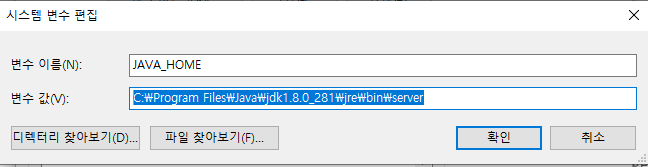

#### 우분투

Install Java 1.8 or up

```
sudo apt-get install g++ openjdk-8-jdk curl
```

In [ ]:
! java --version

In [ ]:
! python -V

## 2. KoNLPy 설치


### - Python3.9, 2022/07 

Python 3.8, 3.9

Python3.9 에서 설치된 버전
 - JPype1-1.4.0 
 - konlpy-0.6.0
 - nltk 3.7
 - numpy==1.22.4

In [ ]:
! pip install konlpy

## 1. 한국어 말뭉치 지원
* kolaw: 한국 법률 말뭉치 (constitution.txt)
* kobill: 대한민국 국회 의안 말뭉치 (1809890.txt ~ 1809899.txt)


In [ ]:
from konlpy.corpus import kolaw
kolaw.fileids()

In [ ]:
c = kolaw.open('constitution.txt').read()
print(c[:500])

In [ ]:
from konlpy.corpus import kobill
print(kobill.fileids())

In [ ]:
doc_ko = kobill.open('1809897.txt').read()
print(doc_ko[:100])

### 말뭉치 정리

1. https://corpus.korean.go.kr/
1. https://ilis.yonsei.ac.kr/corpus/#/
1. https://zetawiki.com/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%A7%90%EB%AD%89%EC%B9%98_%EB%AA%A8%EC%9D%8C

## 2. 형태소 분석 및 품사 태깅


한국어 형태소 분석기 프로젝트

http://konlpy-ko.readthedocs.io

프로젝트 | 이름 | 홈페이지
:---- | :---- | :----
한나눔 | Hannanum | http://kldp.net/hannanum/
꼬꼬마 | Kkma | http://kkma.snu.ac.kr/ 
코모란 | Komoran | http://www.shineware.co.kr/products/komoran/ 
은전한닢 | Mecab | https://bitbucket.org/eunjeon/mecab-ko/ 
트위터 | Okt | https://github.com/open-korean-text/open-korean-text

비교 http://konlpy.org/en/v0.4.4/morph/

각 클래스의 주요 메소드
* morphs : 형태소 추출
* nouns : 명사 추출
* pos : pos 태깅

### 한글 Token 생성

일정한 뜻을 가진 가장 작은 말의 단위로 토큰화 한다. 문장에서 단어를 검색해서 토큰을 추출한다. 토큰은 문장(sentence) 단위, 단어(word) 단위로 토큰화한다.

 - from nltk.tokenize import sent_tokenize # 문장으로 나누기
- from nltk.tokenize import word_tokenize # 단어로 나누기 
- from nltk.tokenize import regexp_tokenize # 정규식으로 나누기
- 한글 형태소 분석기 
   - `konlp.tag.[분석기].morphs()` 
   - `konlp.tag.[분석기].nouns()` 

In [ ]:
doc_ko = kobill.open('1809897.txt').read()
print(doc_ko[:100])

In [ ]:
import nltk

tokens_ko = nltk.regexp_tokenize(doc_ko, r'(\w+)')
tokens_ko

In [ ]:
nltk.word_tokenize(doc_ko)

In [ ]:
from konlpy.tag import Hannanum, Kkma, Komoran, Mecab, Okt

okt = Okt()
okt.nouns(doc_ko)

In [ ]:
okt.morphs(doc_ko)

### 한국어 형태소 분석

- 한글 형태소 분석기 
   - `konlp.tag.[분석기].morphs()` 
   - `konlp.tag.[분석기].nouns()` 

In [ ]:
morphs = Okt().morphs('아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

In [ ]:
morphs = Okt().morphs('아버지가방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

In [ ]:
morphs = Kkma().morphs('아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

In [ ]:
morphs = Kkma().morphs('아버지가방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

In [ ]:
morphs = Hannanum().morphs('아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

In [ ]:
morphs = Hannanum().morphs('아버지가방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

### 한국어 품사 태깅

텍스트를 태그하는 길은 여러가지 있다. 아주 자주 사용하는 것으로 POS 태깅이 있다. 

형태소 분석기의 `.pos()` 함수는  사용해서 행태소의 품사를 얻어서 **(<형태소>,<품사>)** 튜플 리스트를 반환한다.


In [ ]:
Kkma().sentences('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Kkma().nouns('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Kkma().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Kkma().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Hannanum().nouns('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Hannanum().morphs('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Hannanum().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Okt().nouns('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Okt().morphs('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Okt().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

###  `nltk.Text()` 활용


[nltk.text.Text](http://www.nltk.org/api/nltk.html#nltk.text.Text) 에서 제공하는 API 를 사용해 보자. 텍스트를 토큰으로 래핑해주는 기능이며 여러 메서드 (couting, concordanceing, collocation discovery...)는 분석의 다양성을 제공한다.

- [class nltk.text.Text(tokens, name=None)](https://www.nltk.org/api/nltk.html?highlight=nltk%20text#nltk.text.Text) 

들여온 문서는`nltk.Text()`는 문서 하나를 편리하게 탐색하도록 태그를 생성해 준다. 

In [ ]:
doc_ko = kobill.open('1809897.txt').read()
tokens_ko = nltk.regexp_tokenize(doc_ko, r'(\w+)')
tokens_ko

In [ ]:
tokens_ko[:10]

In [ ]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809897호')

In [ ]:
type(ko)

In [ ]:
ko.tokens

#### 빈도분포 `.vocab()`

`.vocab()` 은 토큰의 **빈도분포(frequency distribution)**를 반환해 준다.

In [ ]:
ko.vocab()

In [ ]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

필터링...

단어와 일치하는 토큰수..

In [ ]:
ko.count('교육')

In [ ]:
ko.count('지원')

분산(Dispersion) 플롯

In [ ]:
plt.figure(figsize=(12,6))
ko.dispersion_plot([ 'UAE', '군', '교육훈련', '지원' ])

#### 일치(Concordance)

토큰에서 일치하는 부분을 출력한다.

In [ ]:
ko.concordance('UAE', lines=5)

### 유사 단어 찾기

[text.Text.similar()](https://www.nltk.org/api/nltk.html?highlight=nltk%20text#nltk.text.Text.similar)는 분포 유사성에 따라 단어를 찾는다.

In [ ]:
ko.similar('부대')

---

## 요약

* KoNLPy 코퍼스
* 한글 형태소 분석
* 한글 단어 토큰
* NLTK Text
* PoS Tagging


# 빈도 분석 응용

## 영문 빈도분석

In [ ]:
mydoc = None
with open('data/트럼프취임연설문.txt', 'r', encoding='euc-kr') as f:
# with open(path, 'r', encoding='cp949') as f:
    mydoc = f.read()
    
mydoc[:100]

In [ ]:
tokenizer = RegexpTokenizer('[\w]+')

In [ ]:
words = mydoc.lower()
tokens = tokenizer.tokenize(words)

### NLTK 영문 불용어

In [ ]:
stop_words = stopwords.words('english')

In [ ]:
stopped_tokens = [word for word in list(tokens) if not word in stop_words]
stopped_tokens2 = [word for word in stopped_tokens if len(word) > 1]

### pandas 이용 빈도

In [ ]:
import pandas as pd
myseries = pd.Series(stopped_tokens2).value_counts()
myseries.head(10)

In [ ]:
mydic = dict(myseries)

In [ ]:
mydic

In [ ]:
import matplotlib.pyplot as 
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(background_color="white", random_state=0)
plt.figure(figsize=(12,8))
plt.imshow(wc.generate_from_frequencies(dict(myseries[:50])))
plt.axis("off")
plt.show()

>

>

## 한글 빈도분석

In [ ]:
path = 'data/문재인대통령취임연설문.txt'
mydoc = None
with open(path, 'r', encoding='euckr') as f:
    mydoc = f.read()
    
mydoc[:100]

## 한글 불용어


한국어 같은 경우는 토큰화 단계에서 조사나, 접속사를 제거하면 됨으로 따로 정해진 불용어가 없다.

필요없는 명사나 형용사를 제거하고자 할 때 아래 코드와 같이 직접 불용어 리스트를 정의한 다음 한국어 불용어를 제거한다.


In [ ]:
# 샘플
words = ['소설', '시', '인문', '역사', '예술', '종교', '사회', '과학','경제 경영', '자기계발', '만화', '여행', '잡지',
        '어린이', '청소년','유아', '요리','육아', '가정 살림', '건강 취미', '대학교재','국어와 외국어', 'IT 모바일',
        '수험서 자격증', '초등참고서', '중고등참고서']   #yes24.com의 Category

In [ ]:
stopwords = ['유아', '청소년', '어린이', '육아', '성인', '19금']

In [ ]:
[word for word in words if word not in stopwords]

### 불용어 파일 사용

 - ex: https://www.ranks.nl/stopwords/korean

In [ ]:
ko_text = open('data/눈의여왕.txt', encoding='utf-8').read()
ko_stops = open('data/한글불용샘플.txt', encoding='utf-8').read()

In [ ]:
ko_text

In [ ]:
word_tokens = nltk.word_tokenize(ko_text)
stop_words = ko_stops.split(' ')

In [ ]:
# ko_list = [] 
# for w in word_tokens: 
#     if w not in stop_words: 
#         ko_list.append(w) 

In [ ]:
len(word_tokens)

In [ ]:
# 불용어 제거
ko_tokens = [each_word for each_word in word_tokens if each_word not in stop_words]

In [ ]:
len(ko_tokens)

In [ ]:
ko_tokens = [word for word in ko_tokens if len(word) > 1]   #1글자 제외

In [ ]:
len(ko_tokens)

In [ ]:
wc = WordCloud(font_path= "C:/Windows/Fonts/NanumGothic.ttf",
               background_color='white', max_words=2000,
              stopwords = stop_words)
# wc = wc.generate(ko_list) # array-like
wc = wc.generate(str(ko_tokens))
wc.words_

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### nltk.Text 이용

In [ ]:
ko_nouns = Okt().nouns(ko_text)

In [ ]:
len(ko_nouns)

In [ ]:
# 불용어 제거
ko_tokens = [word for word in ko_nouns if word not in stop_words]

In [ ]:
len(ko_tokens)

In [ ]:
ko_tokens = [word for word in ko_tokens if len(word) > 1]   #1글자 제외

In [ ]:
len(ko_tokens)

In [ ]:
# nltk.Text 이용
import nltk
kotext = nltk.Text(ko_nouns)

In [ ]:
kodic = kotext.vocab().most_common(100)

In [ ]:
# font_path = '~/Library/Fonts/NanumGothic.otf'
font_path= "C:/Windows/Fonts/NanumGothic.ttf"

wordcloud = WordCloud(font_path=font_path,
                      relative_scaling = 0.2,
                      background_color='white')

wordcloud = wordcloud.generate_from_frequencies(dict(kodic))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Naver 뉴스검색 빈도분석

In [ ]:
import requests
from bs4 import BeautifulSoup

# url = 'https://search.naver.com/search.naver?query=삼성전자'
url = 'https://search.naver.com/search.naver?where=news&query=삼성전자'
headers = {'user-agent': 'Mozilla/5.0'}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text)
[s.extract() for s in soup('script')]

### pandas 이용 빈도분석

In [ ]:
from konlpy.tag import Okt, Kkma

news_nouns = Kkma().nouns(soup.text)
news_nouns[:20]

In [ ]:
news_nouns = Okt().nouns(soup.text)
news_nouns[:20]

In [ ]:
# 불용어 제거
news_tokens = [word for word in news_nouns if word not in stop_words]

In [ ]:
len(news_tokens)

In [ ]:
news_tokens = [word for word in news_tokens if len(word) > 1]   #1글자 제외

In [ ]:
len(news_tokens)

In [ ]:
import pandas as pd
dataseries = pd.Series(news_nouns).value_counts()
dataseries.head(10)

In [ ]:
# font_path = '~/Library/Fonts/NanumGothic.otf'
font_path= "C:/Windows/Fonts/NanumGothic.ttf"

wordcloud = WordCloud(font_path=font_path,
                      relative_scaling = 0.2,
                      background_color='white')

wordcloud = wordcloud.generate_from_frequencies(dict(dataseries[:50]))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()